In [1]:
import functools
import numpy as np
from beam.system import System
from beam import mesh
from beam import postprocessing
import matplotlib.pyplot as plt

# Static analysis
## Cantilever bend with force control

In [2]:
mat = {
    'Area':1.0,
    'Elastic modulus':1.0,
    'Shear modulus':1.0,
    'Inertia primary':1.0,
    'Inertia secondary':2.0,
    'Inertia torsion':1.0,
    'Shear coefficient primary':1.0,
    'Shear coefficient secondary':1.0,
    'Density':1.0,
    'Contact radius':1.0
}

(coordinates, elements) = mesh.line_mesh(A=(0,0,0), B=(1,0,0), n_elements=5, order=1, material=mat, reference_vector=(0,0,1))
cantilever = System(coordinates, elements)
cantilever.time_step = 0.2
cantilever.final_time = 1.0
cantilever.solver_type = 'static'
cantilever.contact_detection=False

def user_force_load(self):
    n_nodes = self.get_number_of_nodes()
    Q = np.zeros((6, n_nodes))
    Q[5,-1] = self.current_time*np.pi
    return Q

cantilever.degrees_of_freedom[-1][:6,0] = False  # [current time][dof 0 through 5, node 0]

cantilever.force_load = functools.partial(user_force_load, cantilever)

Hello, world!
This is a FEM program for beam analysis.
This will be a static analysis.
Time step: 1 (time 0.0 --> 0.2)
	Time step converged within 3 iterations.

Time step: 2 (time 0.2 --> 0.4)
	Time step converged within 3 iterations.

Time step: 3 (time 0.4 --> 0.6000000000000001)
	Time step converged within 3 iterations.

Time step: 4 (time 0.6000000000000001 --> 0.8)
	Time step converged within 3 iterations.

Time step: 5 (time 0.8 --> 1.0)
	Time step converged within 3 iterations.

Computation is finished, reached the end of time.


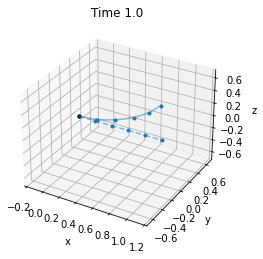

In [3]:
cantilever.printing = True
cantilever.print_residual = False
cantilever.solve()
postprocessing.line_plot(cantilever, xlim=(-0.2,1.2), ylim=(-0.7,0.7), zlim=(-0.7,0.7), time_step=-1)